In [1]:
import numpy as np
import scipy.stats as sps
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)

import warnings
warnings.filterwarnings("ignore")

### Одновыборочный T-критерий

$X_1, ..., X_n \sim \mathcal{N}(a, \sigma^2)$

$H_0: a = a_0$

$H_1: a \not= a_0$ 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp">`ttest_1samp`</a>`(a, popmean): statistic, pvalue`

* `a` --- выборка
* `popmean` --- равно $a_0$

In [2]:
sample = sps.norm(loc=0).rvs(size=100)
sps.ttest_1samp(sample, 0), sps.ttest_1samp(sample, 0.5)

(Ttest_1sampResult(statistic=-2.0018662191752035, pvalue=0.048035087710081116),
 Ttest_1sampResult(statistic=-6.64060058742694, pvalue=1.6966854610391063e-09))

### Двухвыборочный T-критерий Стьюдента (в т.ч. Аспина-Уэлша) -- независимые выборки

Даны две независимые выборки

$X_1, ..., X_n \sim \mathcal{N}(a_1, \sigma_1^2)$

$Y_1, ..., Y_m \sim \mathcal{N}(a_2, \sigma_2^2)$

$H_0: a_1 = a_2$

$H_1: a_1 \not= a_2$ 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind">`ttest_ind`</a>`(a, b, equal_var=True): statistic, pvalue`

`a`, `b` --- выборка

`equal_var` --- известно ли равенство дисперсий

In [3]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sps.norm(loc=1).rvs(size=100)
sps.ttest_ind(sample_1, sample_2)

Ttest_indResult(statistic=-7.010455140178739, pvalue=3.6543059041538224e-11)

In [4]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sps.norm(loc=1, scale=7).rvs(size=100)
sps.ttest_ind(sample_1, sample_2, equal_var=False)

Ttest_indResult(statistic=-1.3774150419903046, pvalue=0.1713421077316969)

### Двухвыборочный T-критерий Стьюдента -- связные выборки

Даны две связные выборки

$X_1, ..., X_n \sim \mathcal{N}(a_1, \sigma_1^2)$

$Y_1, ..., Y_n \sim \mathcal{N}(a_2, \sigma_2^2)$

$H_0: a_1 = a_2$

$H_1: a_1 \not= a_2$ 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel">`ttest_rel`</a>`(a, b): statistic, pvalue`

`a`, `b` --- выборка

In [5]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sample_1 + sps.norm(loc=0, scale=0.5).rvs(size=100)
sps.ttest_rel(sample_1, sample_2)

Ttest_relResult(statistic=-0.6991704649399177, pvalue=0.4860849244715625)

In [6]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sample_1 + sps.norm(loc=0.5, scale=0.5).rvs(size=100)
sps.ttest_rel(sample_1, sample_2)

Ttest_relResult(statistic=-8.315957202962908, pvalue=5.02692350328025e-13)

### Пример: ирисы Фишера

Визуализация данных

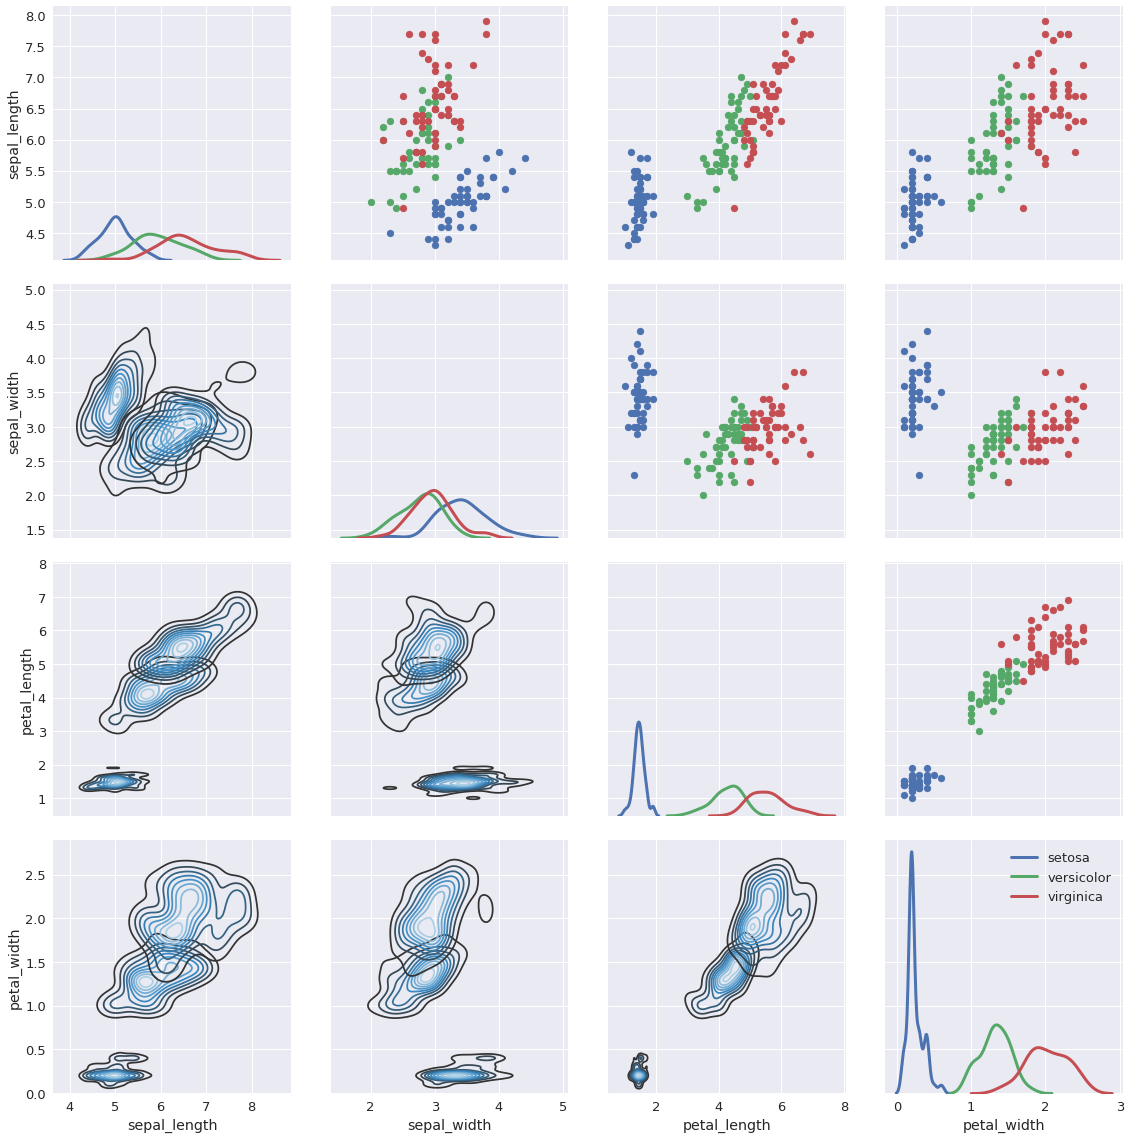

In [7]:
df = sns.load_dataset("iris")

g = sns.PairGrid(df, hue='species', size=4)
g.map_lower(sns.kdeplot, cmap ="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.legend();

Как выглядят данные

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Виды ирисов

In [9]:
np.unique(df.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Нормальность не отвергается, поэтому далее можно использовать критерии, требующие нормальность выборок.

In [10]:
sps.shapiro(df[df.species == 'setosa'].sepal_length), \
sps.shapiro(df[df.species == 'versicolor'].sepal_length), \
sps.shapiro(df[df.species == 'virginica'].sepal_length)

((0.9776989221572876, 0.4595281183719635),
 (0.9778355956077576, 0.46473264694213867),
 (0.9711798429489136, 0.25832483172416687))

In [13]:
sps.shapiro(df[df.species == 'setosa'].sepal_width), \
sps.shapiro(df[df.species == 'versicolor'].sepal_width), \
sps.shapiro(df[df.species == 'virginica'].sepal_width)

((0.97171950340271, 0.2715264856815338),
 (0.9741330742835999, 0.33798879384994507),
 (0.9673910140991211, 0.1809043288230896))

In [11]:
sps.ttest_ind(df[df.species == 'setosa'].sepal_length, 
              df[df.species == 'versicolor'].sepal_length,
              equal_var=False)

Ttest_indResult(statistic=-10.52098626754911, pvalue=3.746742613983842e-17)

In [12]:
sps.ttest_ind(df[df.species == 'virginica'].sepal_length, 
              df[df.species == 'versicolor'].sepal_length,
              equal_var=False)

Ttest_indResult(statistic=5.629165259719801, pvalue=1.8661443873771216e-07)

In [14]:
sps.ttest_ind(df[df.species == 'virginica'].sepal_width, 
              df[df.species == 'versicolor'].sepal_width,
              equal_var=False)

Ttest_indResult(statistic=3.2057607502218186, pvalue=0.001819483482104968)

*Замечание.* Строго говоря, неоходима поправка на множественное тестирование гипотез.

---------

Прикладная статистика и анализ данных, 2019

Никита Волков

https://mipt-stats.gitlab.io/